In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("zomato.csv")

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
df.drop(columns= ['url', 'address', 'phone'], inplace= True)

In [11]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
df.rename(columns= {'approx_cost(for two people)': 'cost', 'listed_in(type)': 'venue', 'listed_in(city)': 'city'}, inplace= True)

In [13]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'venue', 'city'],
      dtype='object')

In [14]:
margin= round(len(df) * 0.05, 2)
margin

2585.85

In [15]:
drop_column= df.columns[df.isna().sum()<= margin]

In [16]:
df.dropna(subset= drop_column, inplace= True)

In [17]:
df.isna().sum()

name                0
online_order        0
book_table          0
rate             7615
votes               0
location            0
rest_type           0
dish_liked      27713
cuisines            0
cost                0
reviews_list        0
menu_item           0
venue               0
city                0
dtype: int64

In [18]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
df.rate= df.rate.str.strip('/5')
df.rate= df.rate.str.strip('-')
df.rate= df.rate.replace('NEW', '')
print(df.rate.dtype)
df.rate= pd.to_numeric(df.rate)
print(f"The class changed to {df.rate.dtype}")

object
The class changed to float64


In [20]:
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 2.6, 3.4, 2. , 2.7, 4.7, 2.4, 2.2, 2.3, 4.8,
       3.5, 2.5, 4.5, 4.9, 2.1, 1.8])

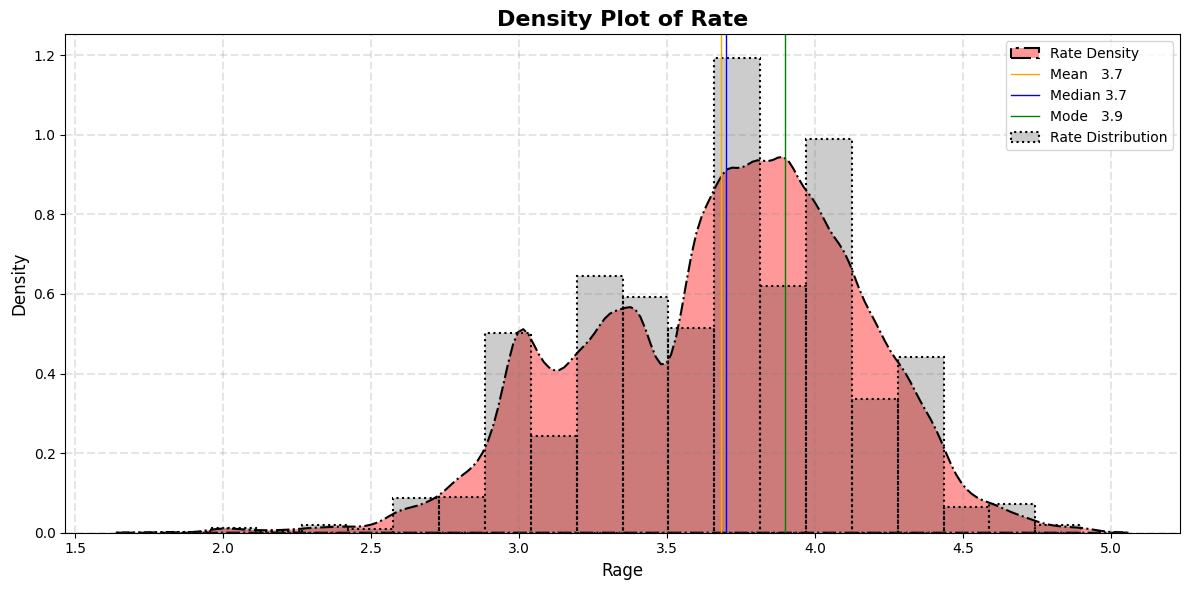

In [21]:
plt.figure(figsize= (12, 6))
sns.kdeplot(x= df.rate, fill= True, label= "Rate Density", linewidth= 1.5, linestyle= "-.", color= "red", edgecolor= "black", alpha= 0.4)
sns.histplot(x= df.rate, kde= False, stat= 'density', bins= 20, fill= True, label= "Rate Distribution", linewidth= 1.5, linestyle= ":", color= "black", alpha= 0.2)
plt.axvline(x= df.rate.mean(), label= f"{'Mean':<6} {round(df.rate.mean(), 1)}", linewidth= 1, linestyle= "-", color= 'orange')
plt.axvline(x= df.rate.median(), label= f"Median {df.rate.median()}", linewidth= 1, linestyle= "-", color= 'blue')
plt.axvline(x= df.rate.mode().iloc[0], label= f"{'Mode':<6} {df.rate.mode().iloc[0]}", linewidth= 1, linestyle= "-", color= 'green')

plt.title("Density Plot of Rate", fontsize= 16, fontweight= 'bold')
plt.xlabel('Rage', fontsize= 12)
plt.ylabel('Density', fontsize= 12)
plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.2)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
df.rate.fillna(round(df.rate.mean(),2), inplace= True)

In [23]:
df.isna().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      27713
cuisines            0
cost                0
reviews_list        0
menu_item           0
venue               0
city                0
dtype: int64

In [24]:
df.dish_liked.unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], shape=(5242,), dtype=object)

In [25]:
df.cuisine= df.dish_liked.str.split(',')

In [26]:
df.cuisine.head()

0    [Pasta,  Lunch Buffet,  Masala Papad,  Paneer ...
1    [Momos,  Lunch Buffet,  Chocolate Nirvana,  Th...
2    [Churros,  Cannelloni,  Minestrone Soup,  Hot ...
3                                        [Masala Dosa]
4                               [Panipuri,  Gol Gappe]
Name: dish_liked, dtype: object

In [27]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,venue,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [28]:
df.cuisine.head(5)

0    [Pasta,  Lunch Buffet,  Masala Papad,  Paneer ...
1    [Momos,  Lunch Buffet,  Chocolate Nirvana,  Th...
2    [Churros,  Cannelloni,  Minestrone Soup,  Hot ...
3                                        [Masala Dosa]
4                               [Panipuri,  Gol Gappe]
Name: dish_liked, dtype: object

In [29]:
dishes= {}

for i in df.cuisine[df.cuisine.notna()]:
    for j in list(i):
        j= j.strip()
        if j in dishes:
            dishes[j]+= 1
        else:
            dishes[j]= 1

In [30]:
print(max(dishes, key= dishes.get))
dishes[max(dishes, key= dishes.get)]

Pasta


3374

In [31]:
x= []
for i in dishes.items():
    if i[1]>= 1000:
        x.append(i)

x

[('Pasta', 3374),
 ('Chicken Biryani', 1322),
 ('Salads', 1390),
 ('Pizza', 2699),
 ('Mocktails', 1873),
 ('Coffee', 1991),
 ('Nachos', 1347),
 ('Sandwiches', 1657),
 ('Burgers', 3001),
 ('Paratha', 1533),
 ('Noodles', 1377),
 ('Biryani', 2076),
 ('Mutton Biryani', 1093),
 ('Thali', 1002),
 ('Beer', 1248),
 ('Tea', 1031),
 ('Fish', 1351),
 ('Cocktails', 2809)]

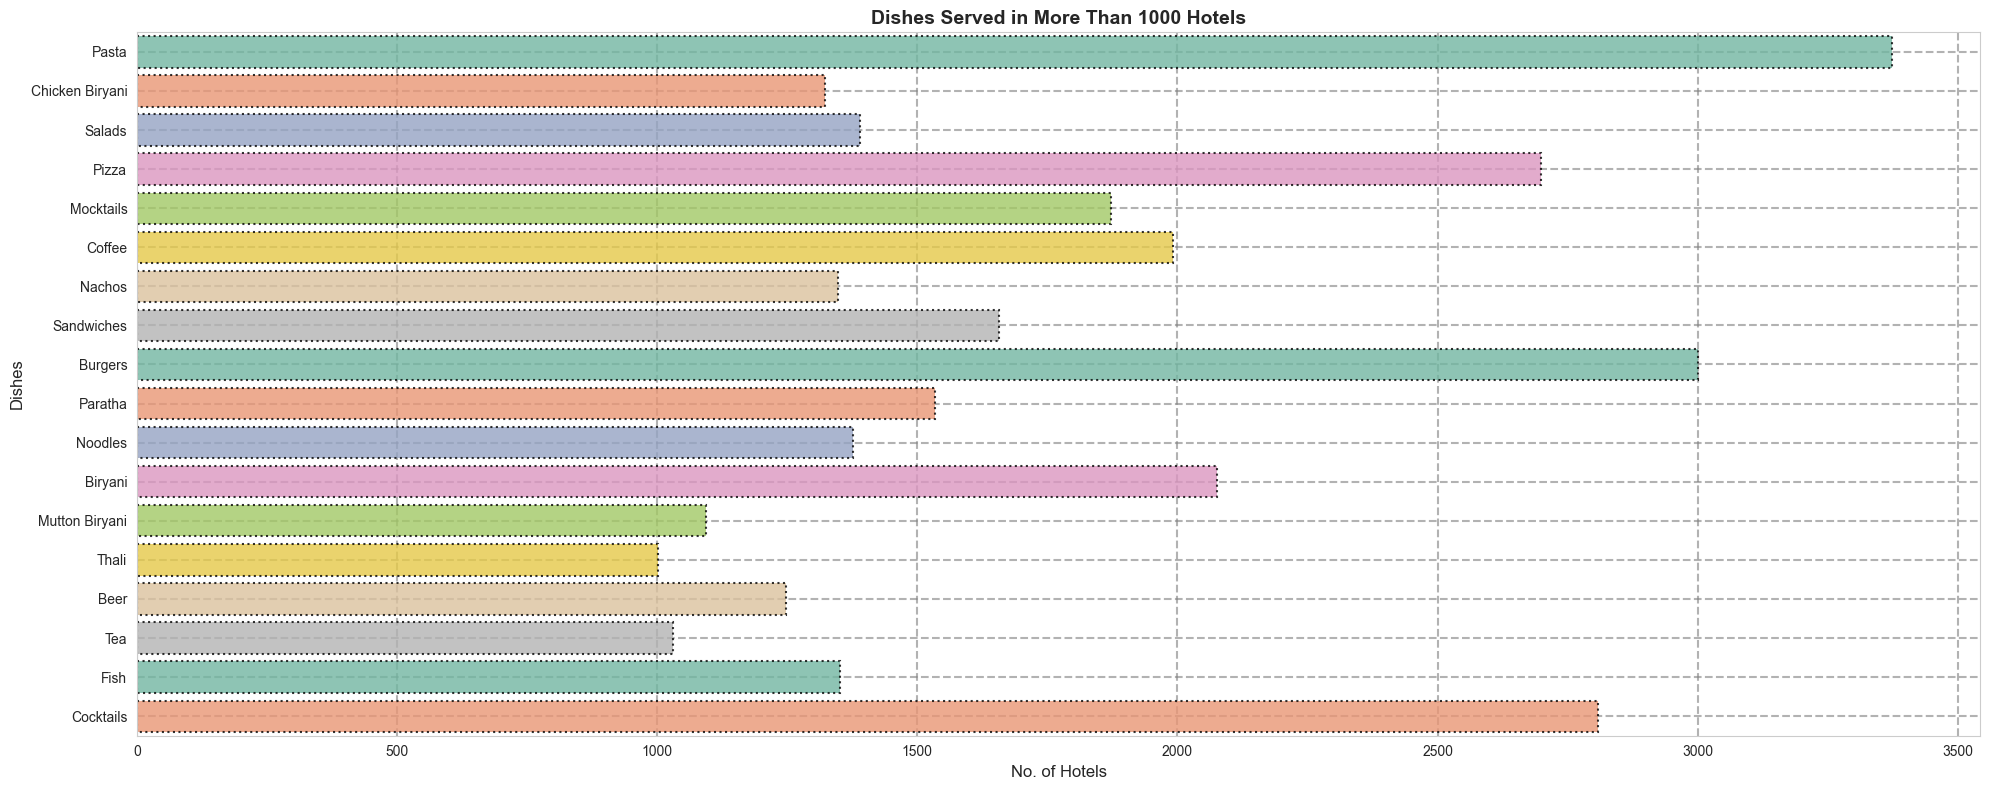

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize= (20, 8))
sns.barplot(x= [a[1] for a in x], y= [b[0] for b in x], linewidth= 1.5, linestyle= ':', palette= "Set2", edgecolor= "black", width= 0.8, alpha= 0.8)

plt.title("Dishes Served in More Than 1000 Hotels", fontsize= 14, fontweight= 'bold')
plt.xlabel("No. of Hotels", fontsize= 12)
plt.ylabel("Dishes", fontsize= 12)
plt.grid(True, linewidth= 1.5, linestyle= "--", color= "grey", alpha= 0.6)
plt.tight_layout()
plt.show()

In [33]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'venue', 'city'],
      dtype='object')

In [34]:
df.dish_liked.fillna("Pasta", inplace= True)

In [35]:
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
venue           0
city            0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51148 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51148 non-null  object 
 1   online_order  51148 non-null  object 
 2   book_table    51148 non-null  object 
 3   rate          51148 non-null  float64
 4   votes         51148 non-null  int64  
 5   location      51148 non-null  object 
 6   rest_type     51148 non-null  object 
 7   dish_liked    51148 non-null  object 
 8   cuisines      51148 non-null  object 
 9   cost          51148 non-null  object 
 10  reviews_list  51148 non-null  object 
 11  menu_item     51148 non-null  object 
 12  venue         51148 non-null  object 
 13  city          51148 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.9+ MB


In [37]:
df.online_order.unique()

array(['Yes', 'No'], dtype=object)

In [38]:
df.online_order= df.online_order.replace({"Yes": True, "No": False}).astype('bool')

In [39]:
df.book_table.unique()

array(['Yes', 'No'], dtype=object)

In [40]:
df.book_table= df.book_table.replace({"Yes": True, "No": False}).astype('bool')

In [41]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [42]:
df.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [43]:
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [44]:
df.cost= df.cost.str.replace(",", "")

In [45]:
df.cost= pd.to_numeric(df.cost)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51148 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51148 non-null  object 
 1   online_order  51148 non-null  bool   
 2   book_table    51148 non-null  bool   
 3   rate          51148 non-null  float64
 4   votes         51148 non-null  int64  
 5   location      51148 non-null  object 
 6   rest_type     51148 non-null  object 
 7   dish_liked    51148 non-null  object 
 8   cuisines      51148 non-null  object 
 9   cost          51148 non-null  int64  
 10  reviews_list  51148 non-null  object 
 11  menu_item     51148 non-null  object 
 12  venue         51148 non-null  object 
 13  city          51148 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(9)
memory usage: 5.2+ MB


In [47]:
df.venue.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [48]:
df.city.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [49]:
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
venue           0
city            0
dtype: int64

In [50]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rate,51148.0,3.680992,0.408671,1.8,3.5,3.68,3.9,4.9
votes,51148.0,284.917885,806.495210,0.0,7.0,41.00,199.0,16832.0
cost,51148.0,556.043736,439.555299,40.0,300.0,400.00,700.0,6000.0


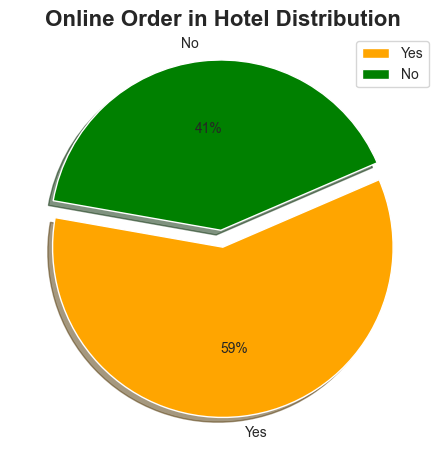

In [51]:
# •	How Many restaurants delivering Online ?

online= df.online_order.value_counts()

plt.pie(x= online, labels= ["Yes", "No"], colors= ['orange', 'green'], autopct= "%.0f%%", explode= (0, 0.1), shadow= True, startangle= 170)

plt.title("Online Order in Hotel Distribution", fontsize= 16, fontweight= 'bold')
plt.legend()
plt.tight_layout()
plt.show()

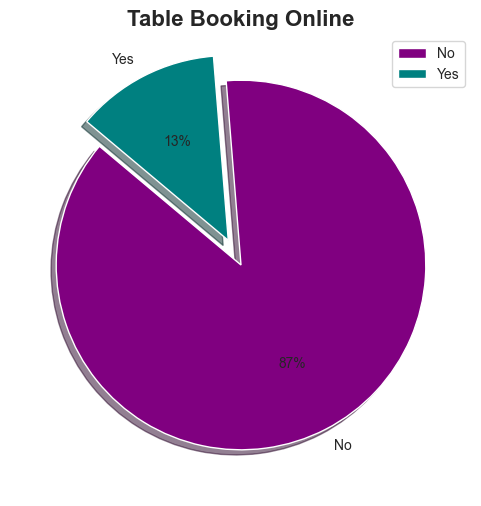

In [52]:
# How many restaurants allowing table booking online?

df.book_table.value_counts()

plt.figure(figsize= (6,6))
plt.pie(x= df.book_table.value_counts(), labels= ["No", "Yes"], autopct= "%.0f%%", colors= ['purple', 'teal'], 
        explode= (0,0.15), startangle= 140,shadow= True)
plt.title("Table Booking Online", fontsize= 16, fontweight= 'bold')
plt.legend()
plt.show()

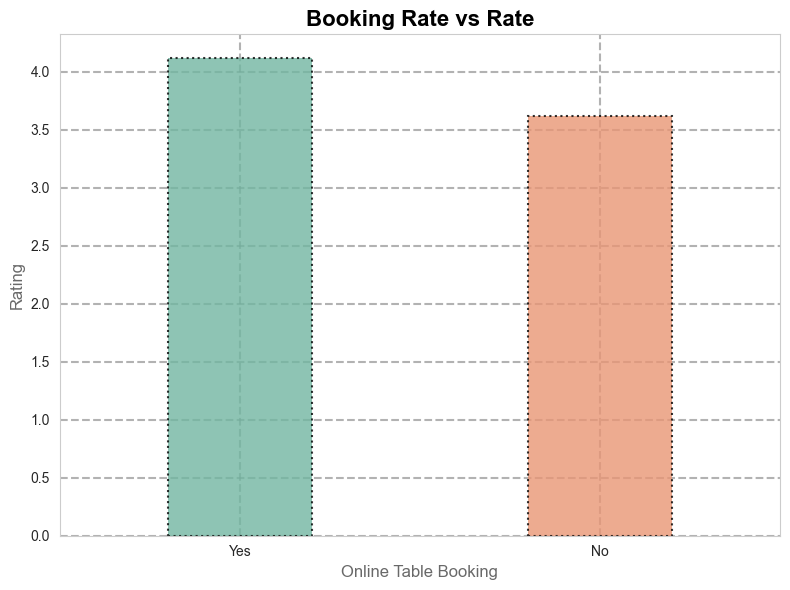

In [53]:
# Table booking Rate vs Rate

table_booking_rate= df.groupby("book_table")["rate"].mean().sort_values(ascending= False)
table_booking_rate.index= ["Yes", "No"]

plt.figure(figsize= (8,6))
sns.set_style("whitegrid")

sns.barplot(x= table_booking_rate.index, y= table_booking_rate.values, linewidth= 1.5, linestyle= ":", palette= "Set2", edgecolor= "black", width= 0.4, alpha= 0.8)

plt.title("Booking Rate vs Rate", fontsize= 16, fontweight= "bold", color= 'black')
plt.xlabel("Online Table Booking", fontsize= 12, color= 'dimgray')
plt.ylabel("Rating", fontsize= 12, color= 'dimgray')
plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.6)
plt.tight_layout()
plt.show()

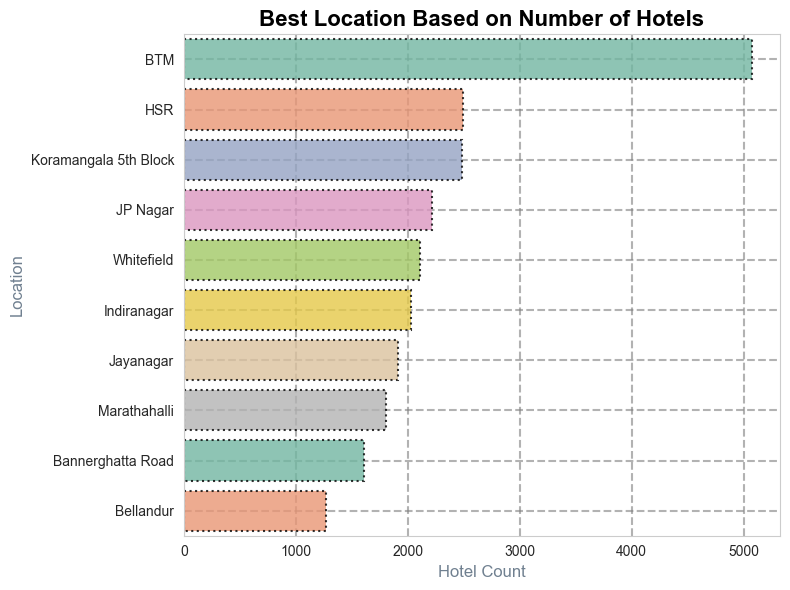

In [54]:
# Best Location

crowded_location= df.location.value_counts().head(10)

plt.figure(figsize= (8,6))
sns.set_style('whitegrid')
sns.barplot(x= crowded_location.values, y=crowded_location.index, linewidth= 1.5, linestyle= ":", palette= "Set2", edgecolor= "black", width= 0.8, alpha= 0.8)

plt.title("Best Location Based on Number of Hotels", fontsize= 16, fontweight= "bold", color= "black")
plt.xlabel("Hotel Count", fontsize= 12, color= "slategray")
plt.ylabel('Location', fontsize= 12, color= "slategray")
plt.grid(True, linewidth= 1.5, linestyle= "--", color= "grey", alpha= 0.6)
plt.tight_layout()
plt.show()

In [55]:
crowded_location

location
BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
Indiranagar              2033
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1611
Bellandur                1271
Name: count, dtype: int64

In [56]:
location_filtering= df.groupby('location')[['rate', 'votes']].mean().sort_values(by= ['rate', 'votes'], ascending= False).head(10)
location_filtering

,rate,votes
location,,
Lavelle Road,4.095143,966.462715
St. Marks Road,3.999708,775.798834
Koramangala 3rd Block,3.974074,579.439815
Koramangala 5th Block,3.965103,892.715437
Church Street,3.961933,1045.657293
Sankey Road,3.954815,237.444444
Cunningham Road,3.875519,586.299389
Koramangala 4th Block,3.871957,673.703048
Rajarajeshwari Nagar,3.850000,366.000000


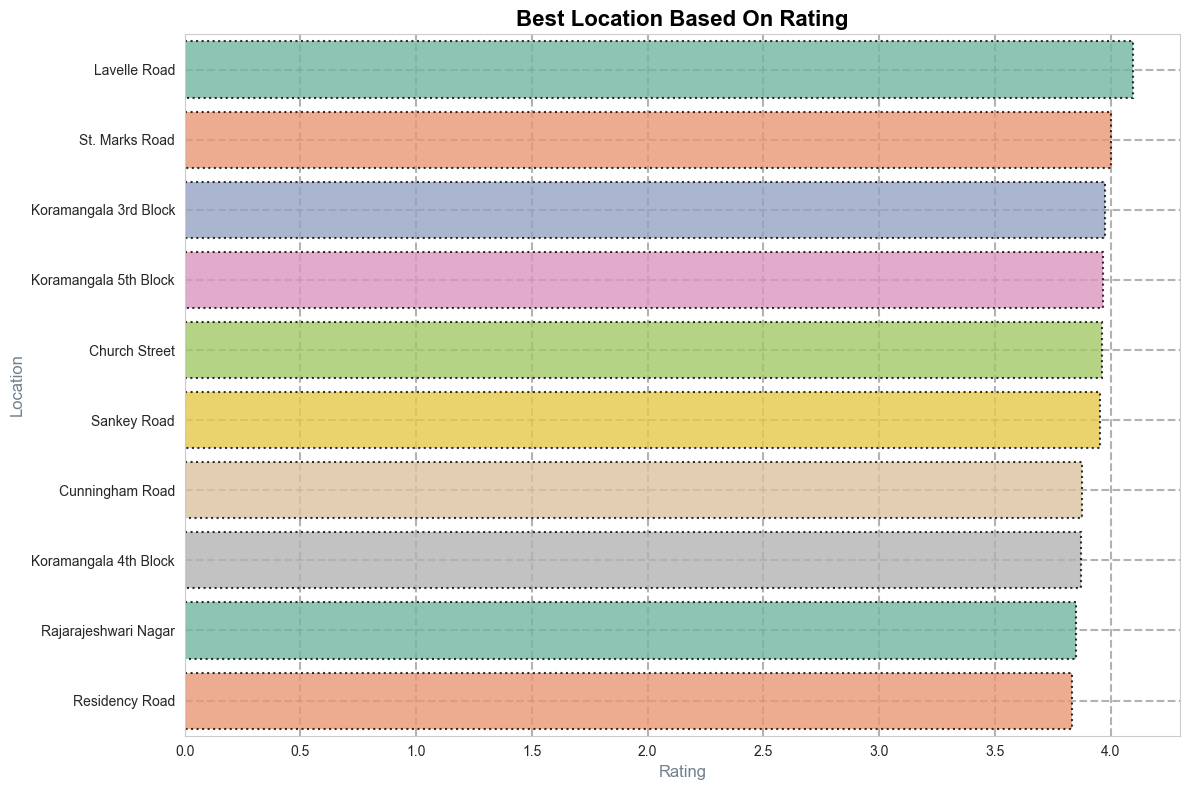

In [57]:
# Relation between Location and Rating
plt.figure(figsize= (12,8))
sns.set_style("whitegrid")
sns.barplot(x= location_filtering.rate, y= location_filtering.index, linewidth= 1.5, linestyle= ":", palette= "Set2", edgecolor= "Black", width= 0.8, alpha= 0.8)
plt.title("Best Location Based On Rating", fontsize= 16, fontweight= 'bold', color= "black")
plt.xlabel("Rating", fontsize= 12, color= "slategray")
plt.ylabel("Location", fontsize= 12, color= "slategray")
plt.grid(True, linewidth= 1.5, linestyle= "--", color= "grey", alpha= 0.6)
plt.tight_layout()
plt.show()

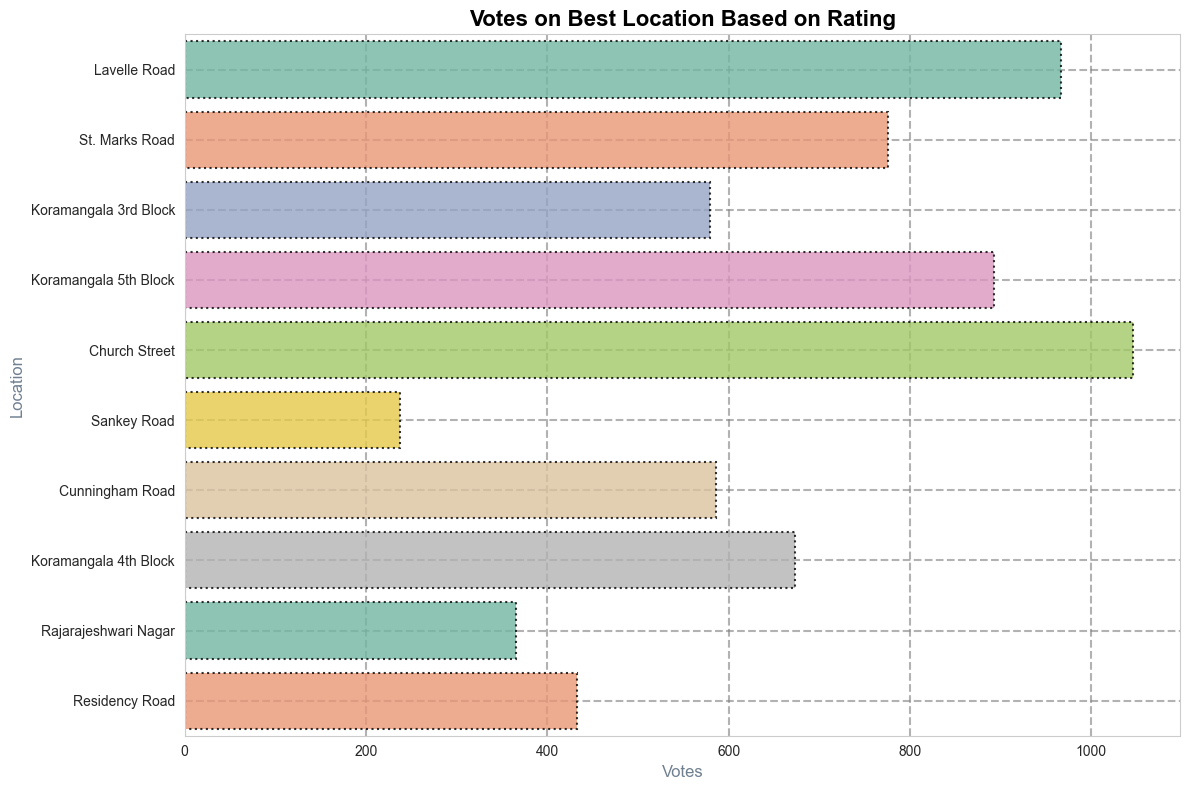

In [58]:
plt.figure(figsize= (12, 8))
sns.set_style("whitegrid")
sns.barplot(x= location_filtering.votes, y= location_filtering.index, linewidth= 1.5, linestyle= ':', palette= "Set2", edgecolor= "black", width= 0.8, alpha= 0.8)
plt.title("Votes on Best Location Based on Rating", fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel('Votes', fontsize= 12, color= 'slategray')
plt.ylabel('Location', fontsize= 12, color= 'slategray')
plt.grid(True, linewidth= 1.5, linestyle= "--", color= "grey", alpha= 0.6)
plt.tight_layout()
plt.show()

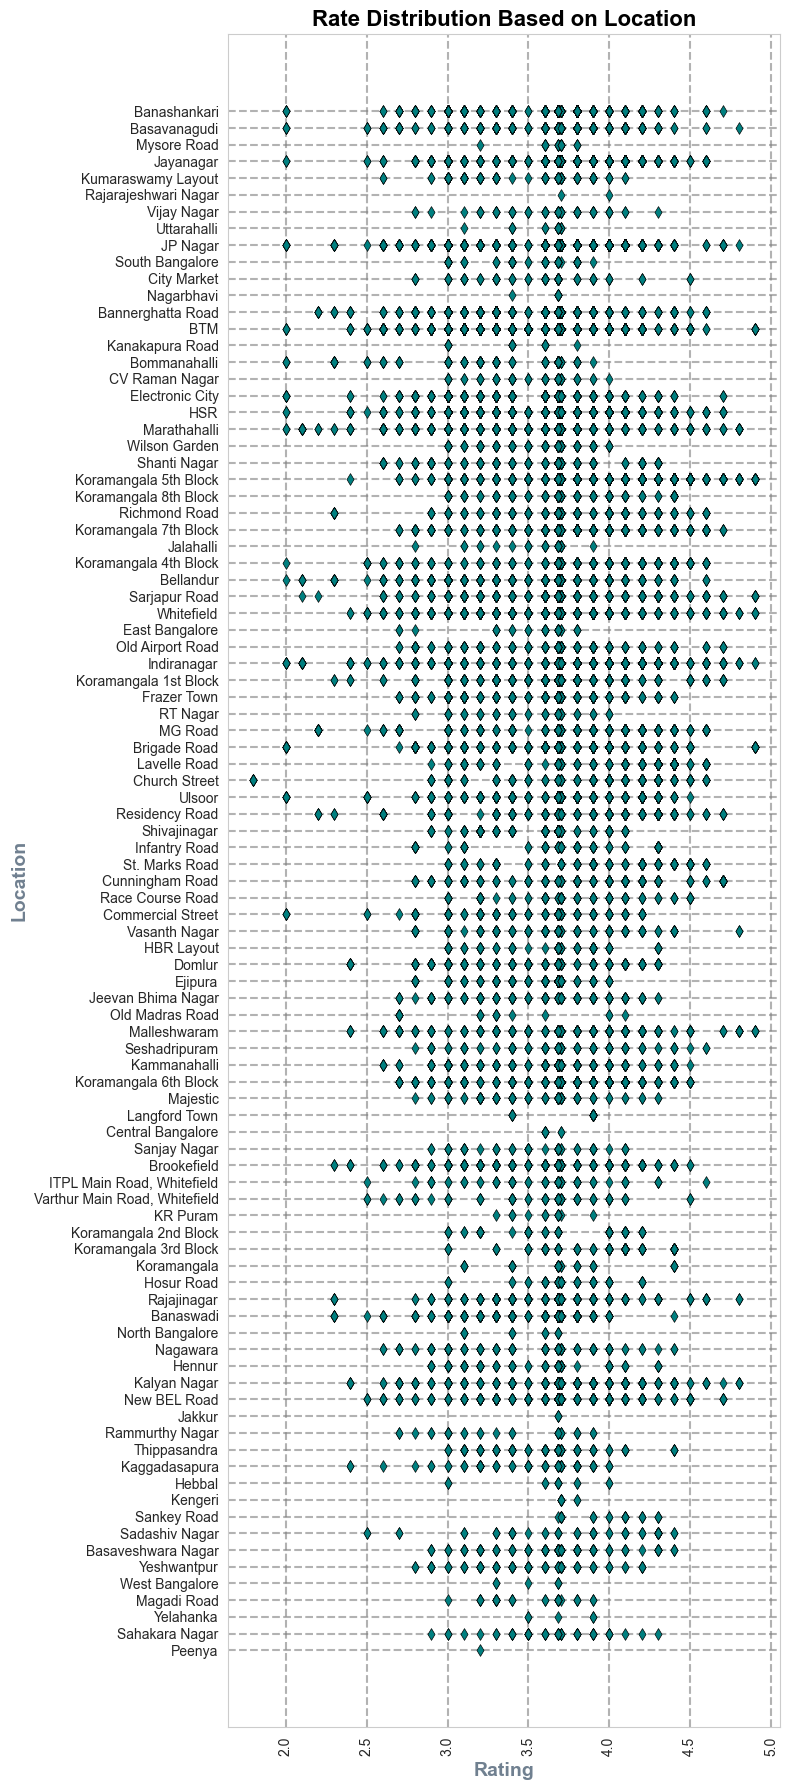

In [59]:
plt.figure(figsize= (8, 18))
sns.set_style('whitegrid')
sns.scatterplot(y= df.location, x= df.rate, marker= 'd', color= 'teal', edgecolor= 'black')
plt.xticks(rotation= 90)
plt.title('Rate Distribution Based on Location', fontsize= 16,  fontweight= 'bold', color= 'black')
plt.xlabel('Rating', fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel('Location', fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha=0.6)
plt.tight_layout()
plt.show()

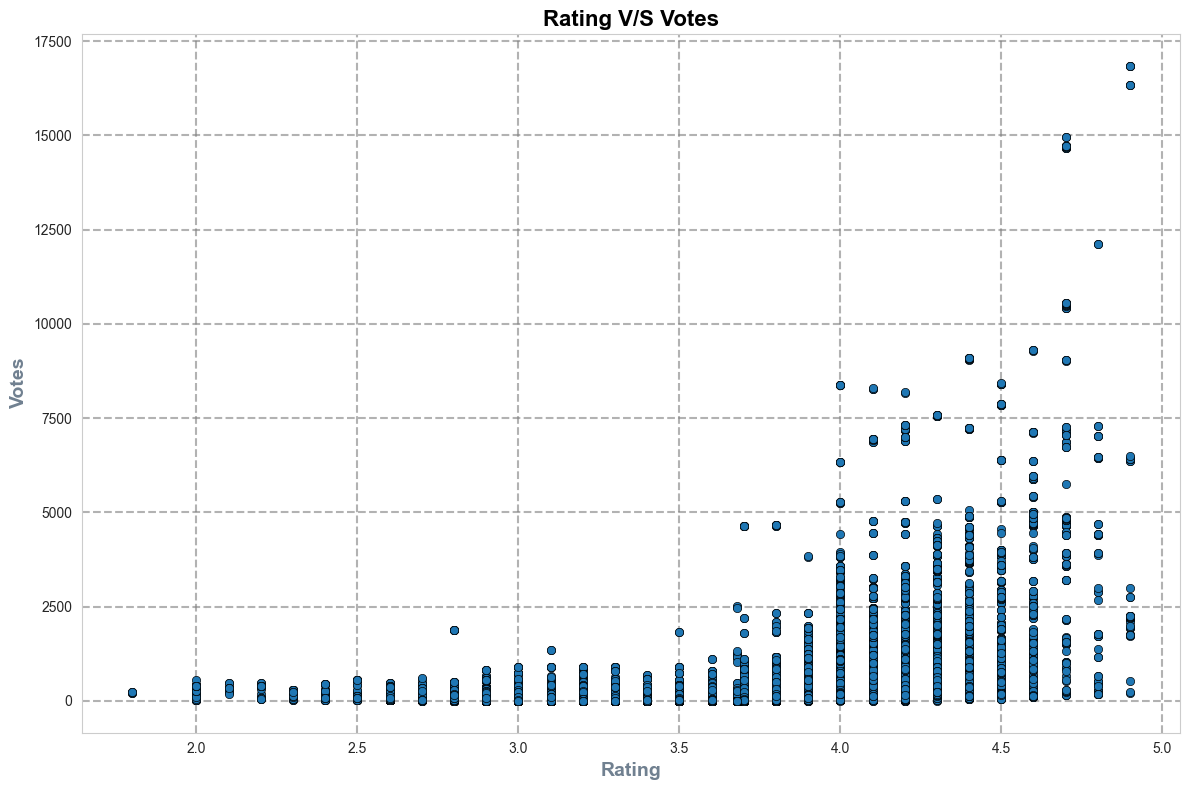

In [60]:
plt.figure(figsize= (12, 8))
sns.set_style('whitegrid')
sns.scatterplot(x= df.rate, y= df.votes, marker= 'o', edgecolor= "black")
plt.title("Rating V/S Votes", fontsize= 16, fontweight= "bold", color= "black")
plt.xlabel("Rating", fontsize= 14, fontweight= "bold", color= 'slategray')
plt.ylabel("Votes", fontsize= 14, fontweight= "bold", color= 'slategray')
plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.6)
plt.tight_layout()
plt.show()

In [61]:
# Types of Venues

df.venue.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [62]:
df.venue.value_counts()

venue
Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: count, dtype: int64

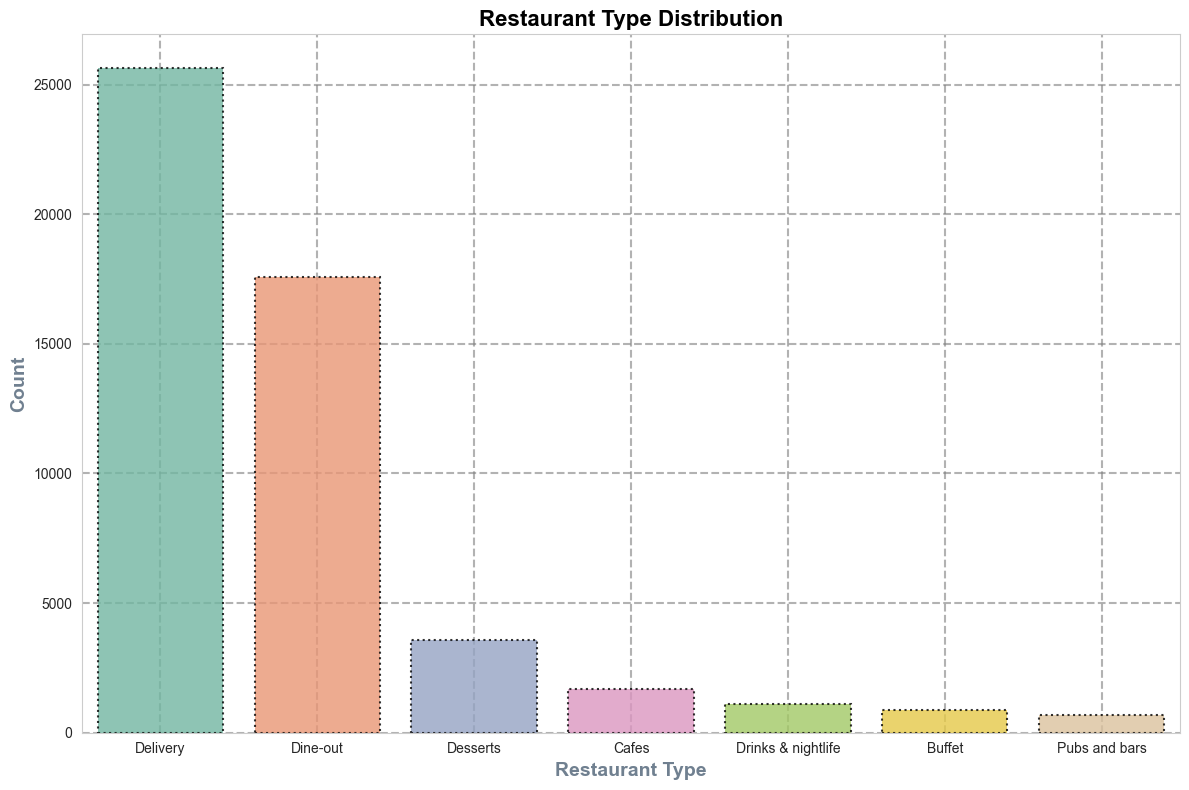

In [63]:
plt.figure(figsize= (12, 8))
sns.set_style("whitegrid")
sns.barplot(x= df.venue.value_counts().index, y= df.venue.value_counts().values, linewidth= 1.5, linestyle= ":", palette= "Set2", edgecolor= "black", width= 0.8, alpha= 0.8)
plt.title("Restaurant Type Distribution", fontsize= 16, fontweight= "bold", color= "black")
plt.xlabel("Restaurant Type", fontsize= 14, fontweight= 'bold', color= "slategray")
plt.ylabel("Count", fontsize= 14, fontweight= 'bold', color= "slategray")
plt.grid(True, linewidth= 1.5, linestyle= "--", color= "grey", alpha= 0.6)
plt.tight_layout()
plt.show()

In [64]:
venue_by_rate= df.groupby('venue')[['rate', 'votes']].mean().sort_values(by= ['rate', 'votes'], ascending= False)
venue_by_rate

,rate,votes
venue,,
Drinks & nightlife,3.988891,1153.977085
Pubs and bars,3.979477,1020.808140
Buffet,3.956188,1005.491389
Cafes,3.837557,482.418086
Desserts,3.737145,150.867659
Dine-out,3.668712,291.280384
Delivery,3.640782,204.881028


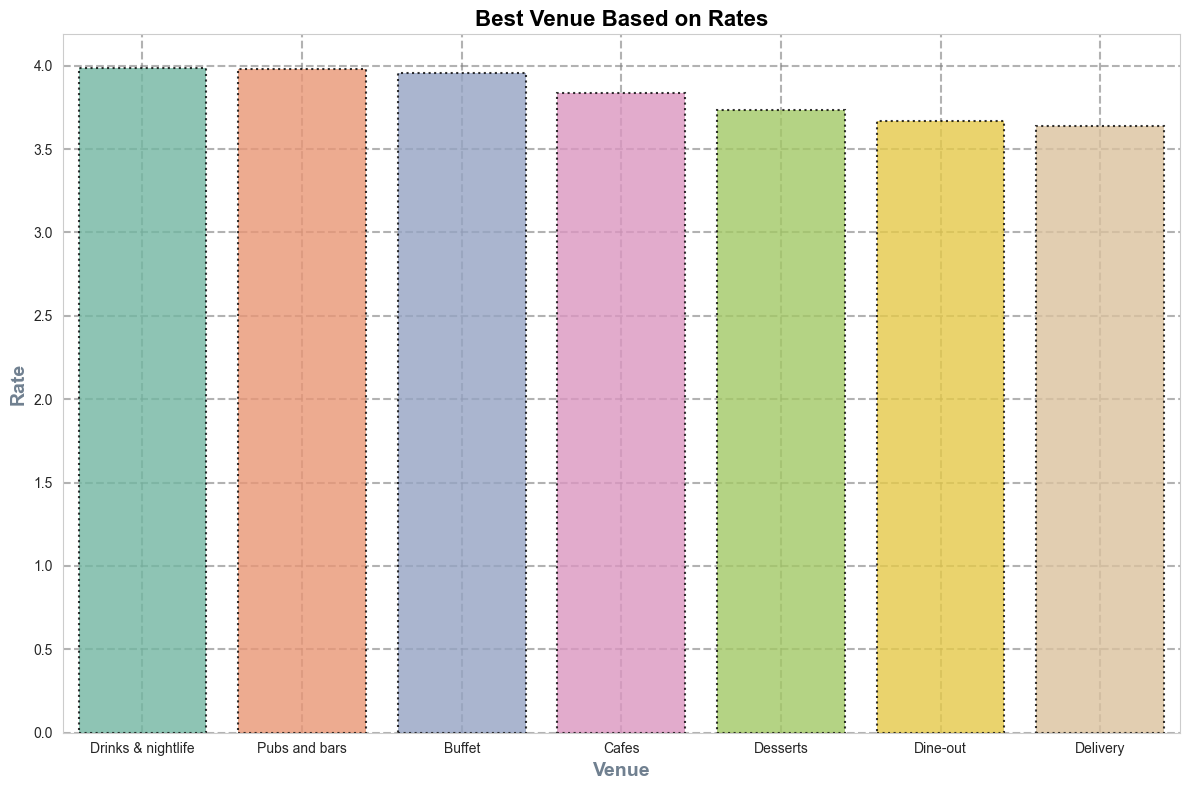

In [65]:
plt.figure(figsize= (12, 8))
sns.set_style('whitegrid')
sns.barplot(x= venue_by_rate.index, y= venue_by_rate.rate, linewidth= 1.5, linestyle= ":", palette= "Set2", edgecolor= "black", width= 0.8, alpha= 0.8)
plt.title("Best Venue Based on Rates", fontsize= 16, fontweight= "bold", color= "black")
plt.xlabel("Venue", fontsize= 14, fontweight= "bold", color= "slategray")
plt.ylabel("Rate", fontsize= 14, fontweight= "bold", color= "slategray")
plt.grid(True, linewidth= 1.5, linestyle= "--", color= "grey", alpha= 0.6)
plt.tight_layout()
plt.show()

In [66]:
# Restaurant Type

df.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [67]:
rest_type_data= {}
for i in df.rest_type:
    for j in i.split(","):
        j=j.strip()
        if j in rest_type_data:
            rest_type_data[j]+= 1
        else:
            rest_type_data[j]= 1
            
rest_type_data

{'Casual Dining': 12952,
 'Cafe': 5021,
 'Quick Bites': 20545,
 'Delivery': 4592,
 'Mess': 271,
 'Dessert Parlor': 3193,
 'Bakery': 1989,
 'Pub': 950,
 'Takeaway': 2130,
 'Fine Dining': 405,
 'Beverage Shop': 1464,
 'Sweet Shop': 745,
 'Bar': 2418,
 'Confectionery': 47,
 'Kiosk': 186,
 'Food Truck': 84,
 'Microbrewery': 378,
 'Lounge': 555,
 'Food Court': 760,
 'Dhaba': 40,
 'Club': 41,
 'Irani Cafee': 15,
 'Bhojanalya': 3,
 'Pop Up': 2,
 'Meat Shop': 4}

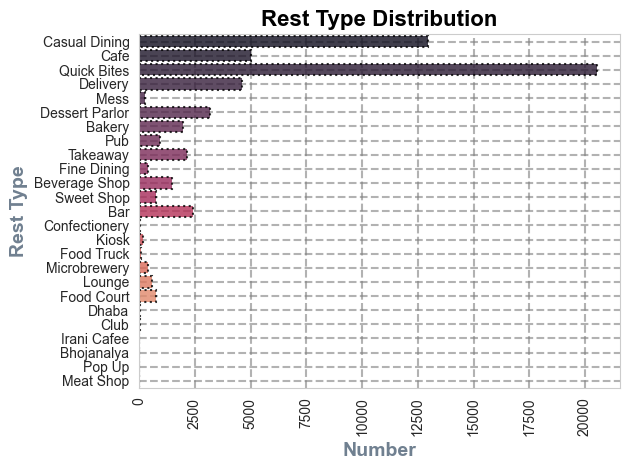

In [68]:
# plt.figure(figsize= (12,8))
sns.set_style("whitegrid")
sns.barplot(y= rest_type_data.keys(), x= rest_type_data.values(), linewidth= 1.5, linestyle= ":", palette= "rocket", edgecolor= "black", width= 0.8, alpha= 0.8)

plt.title("Rest Type Distribution", fontsize= 16, fontweight= "bold", color= "black")
plt.ylabel("Rest Type", fontsize= 14, fontweight= "bold", color= "slategray")
plt.xlabel("Number", fontsize= 14, fontweight= "bold", color= "slategray")
plt.grid(True, linewidth= 1.5, linestyle= "--", color= "grey", alpha= 0.6)
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

In [69]:
# Gaussian Rest type and Rating

df['rest_type_list']= df['rest_type'].str.split(",\s*")
df_exploded= df.explode('rest_type_list')
df_exploded

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,venue,city,rest_type_list
0,Jalsa,True,True,4.10,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Casual Dining
1,Spice Elephant,True,False,4.10,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Casual Dining
2,San Churro Cafe,True,False,3.80,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Cafe
2,San Churro Cafe,True,False,3.80,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Casual Dining
3,Addhuri Udupi Bhojana,False,False,3.70,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51713,Vinod Bar And Restaurant,False,False,3.68,0,Whitefield,Bar,Pasta,Finger Food,600,[],[],Pubs and bars,Whitefield,Bar
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,False,False,3.68,0,Whitefield,Bar,Pasta,Finger Food,2000,[],[],Pubs and bars,Whitefield,Bar
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.30,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,Bar
51716,The Nest - The Den Bengaluru,False,False,3.40,13,"ITPL Main Road, Whitefield","Bar, Casual Dining",Pasta,"Finger Food, North Indian, Continental",1500,"[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield,Bar


In [70]:
rest_type_rate= df_exploded.groupby("rest_type_list")[['rate', 'votes']].mean().sort_values(by= ['rate', 'votes'], ascending= False)
rest_type_rate

,rate,votes
rest_type_list,,
Irani Cafee,4.406667,3686.600000
Microbrewery,4.318995,3061.984127
Fine Dining,4.158123,544.617284
Pub,4.097811,1683.374737
Club,4.048780,1229.731707
Bar,3.956824,841.063689
Lounge,3.938739,1172.585586
Cafe,3.875933,565.385780
Dessert Parlor,3.825850,185.460382


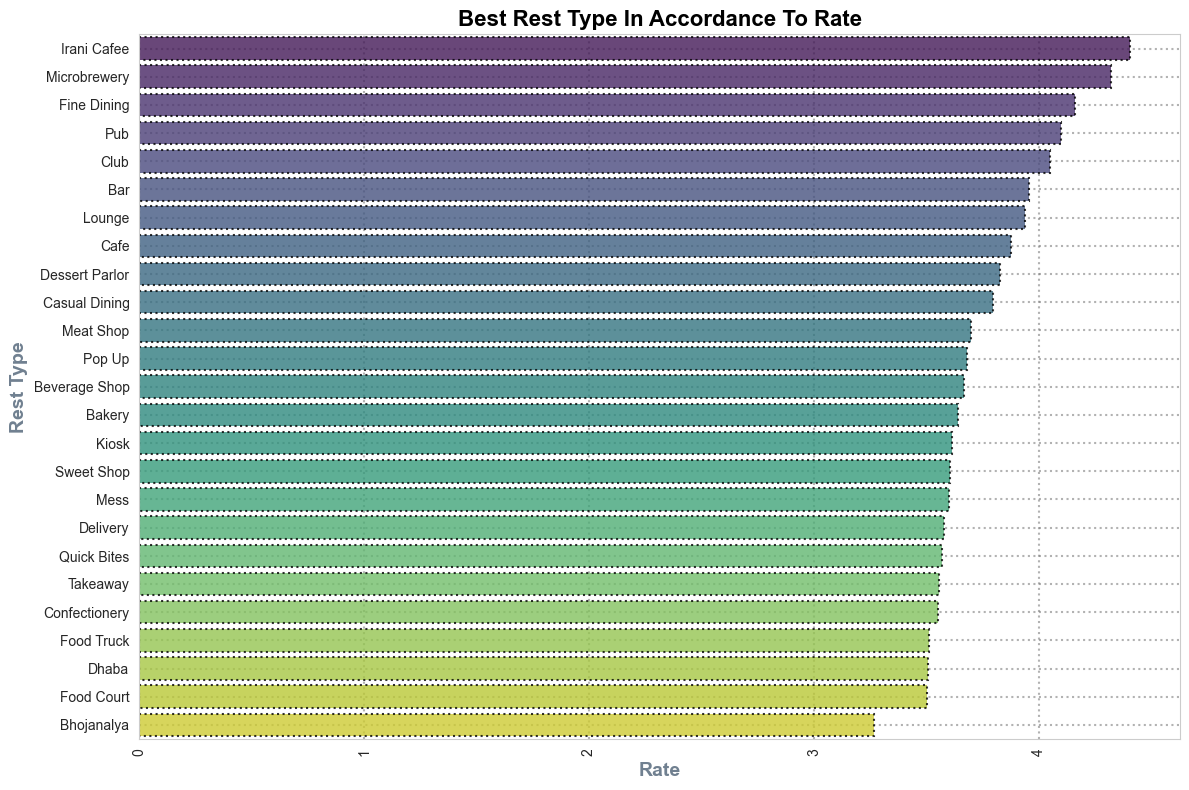

In [71]:
plt.figure(figsize= (12, 8))
sns.set_style('whitegrid')
sns.barplot(y= rest_type_rate.index, x= rest_type_rate.rate, linewidth= 1.5, linestyle= ":", palette= "viridis", edgecolor= "black", width= 0.8, alpha= 0.8)

plt.title("Best Rest Type In Accordance To Rate", fontsize= 16, fontweight= "bold", color= "black")
plt.ylabel("Rest Type", fontsize= 14, fontweight= "bold", color= "slategray")
plt.xlabel("Rate", fontsize= 14, fontweight= "bold", color= "slategray")
plt.xticks(rotation= 90)
plt.grid(True, linewidth= 1.5, linestyle= ":", color= "grey", alpha= 0.6)
plt.tight_layout()
plt.show()

In [72]:
# Cost of Restaurant

df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'venue', 'city', 'rest_type_list'],
      dtype='object')

In [73]:
df.cost.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140])

In [74]:
len(df.name.value_counts())

8723

In [75]:
hotel_by_cost= df.groupby('name')[['cost','rate']].max().sort_values(by= ['cost'], ascending= False).head(10)
hotel_by_cost

,cost,rate
name,,
Le Cirque Signature - The Leela Palace,6000,4.3
Royal Afghan - ITC Windsor,5000,4.3
Malties - Radisson Blu,4500,4.3
La Brasserie - Le Meridien,4100,4.1
Jamavar - The Leela Palace,4000,4.2
Edo Restaurant & Bar - ITC Gardenia,4000,4.3
Alba - JW Marriott Bengaluru,4000,4.5
Masala Klub - The Taj West End,4000,4.4
Grill 99 - The Ritz-Carlton,4000,3.4


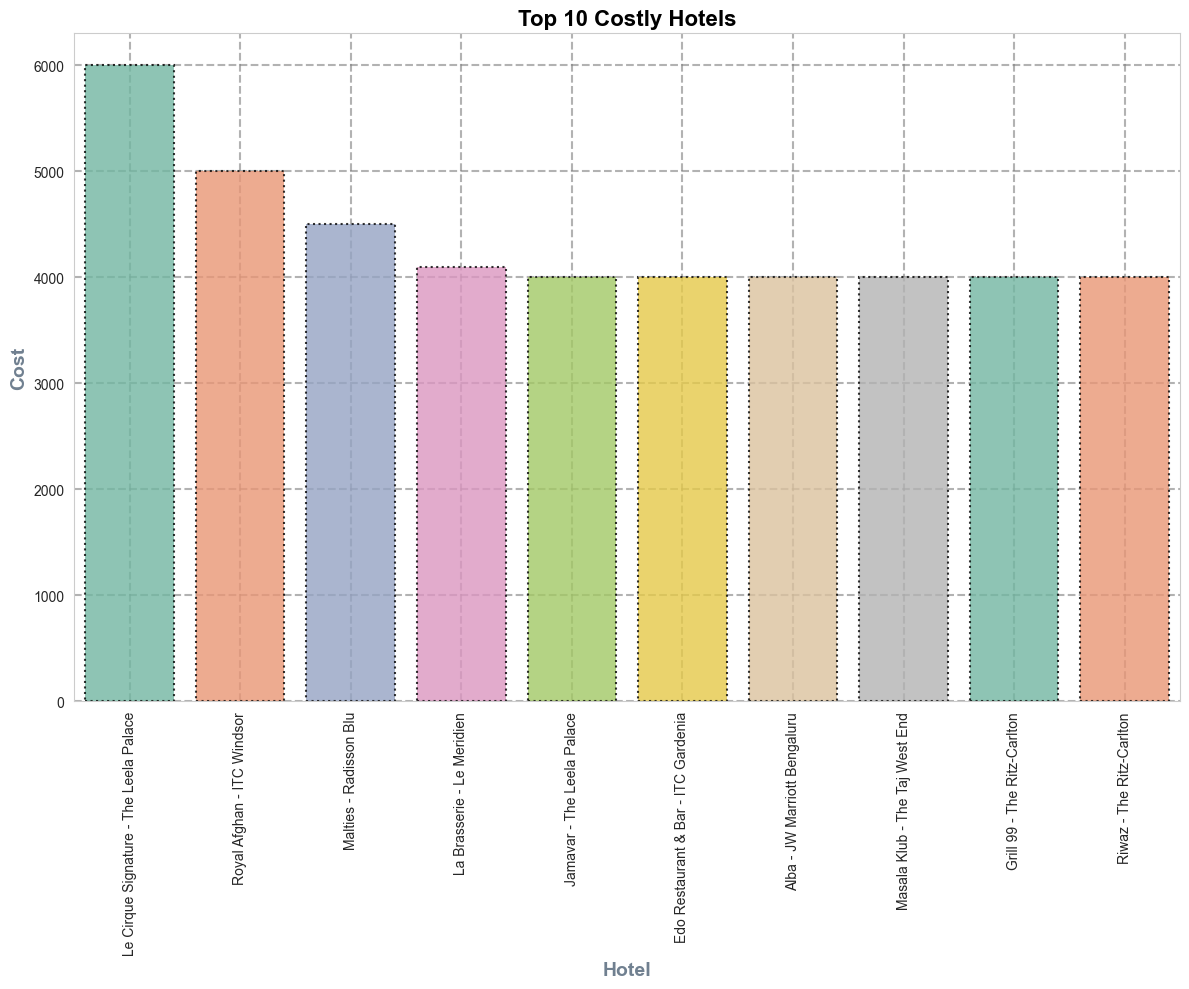

In [76]:
plt.figure(figsize= (12, 10))
sns.set_style('whitegrid')
sns.barplot(x= hotel_by_cost.index, y= hotel_by_cost.cost, linewidth= 1.5, linestyle= ':', palette= 'Set2', edgecolor= 'black', width= 0.8, alpha= 0.8)
plt.title('Top 10 Costly Hotels', fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel('Hotel', fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel('Cost', fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.grid(True, linewidth= 1.5, linestyle= '--', color= 'grey', alpha= 0.6)
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

In [77]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,venue,city,rest_type_list
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,[Casual Dining]
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,[Casual Dining]
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,"[Cafe, Casual Dining]"
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,[Quick Bites]
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,[Casual Dining]


In [78]:
# No. of restaurants in a Location

hotel_count_by_location= df['location'].value_counts().head(10)
hotel_count_by_location

location
BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
Indiranagar              2033
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1611
Bellandur                1271
Name: count, dtype: int64

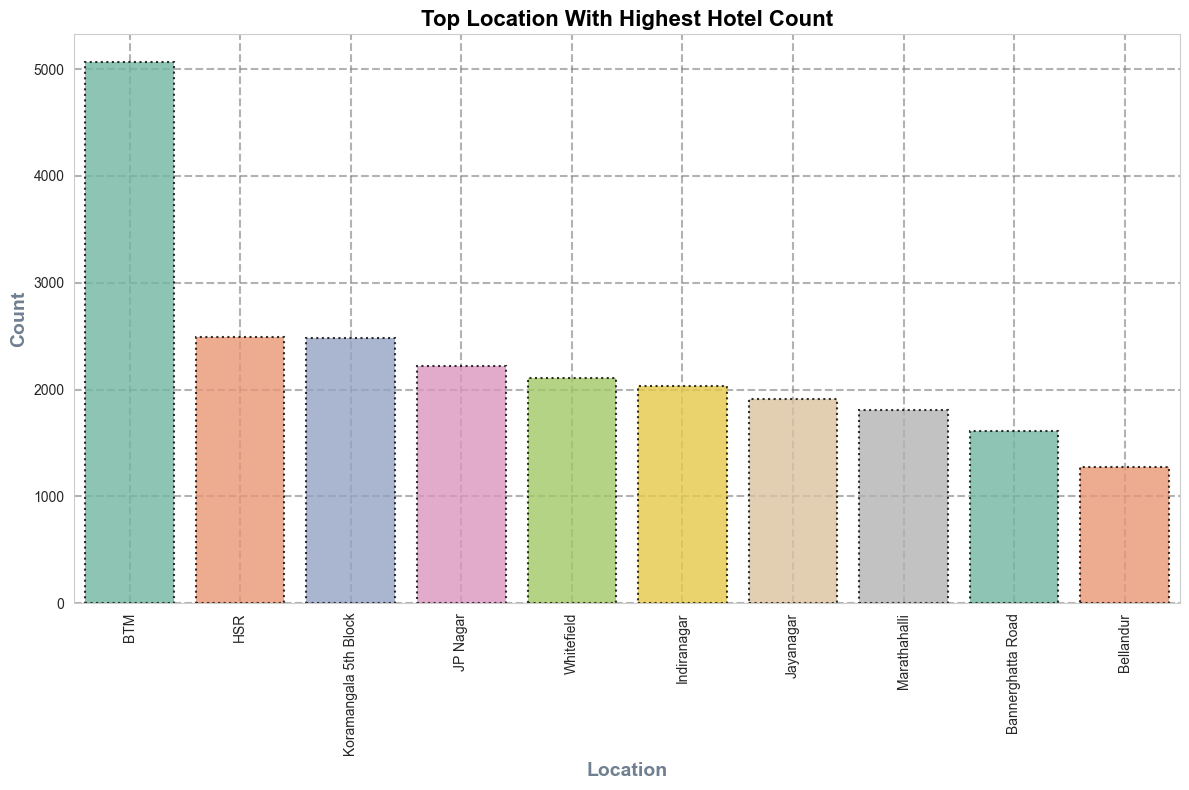

In [79]:
plt.figure(figsize= (12, 8))
sns.set_style('whitegrid')
sns.barplot(x= hotel_count_by_location.index, y= hotel_count_by_location.values, linewidth= 1.5, linestyle= ":", palette= 'Set2', edgecolor= 'black', width= 0.8, alpha= 0.8)

plt.title('Top Location With Highest Hotel Count', fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel('Location', fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel('Count', fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= "--", color= "grey", alpha=0.6)
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

## Practice Questions

## 1. Is there any correlation between the length of a review and the associated rating?

In [80]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,venue,city,rest_type_list
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,[Casual Dining]
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,[Casual Dining]
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,"[Cafe, Casual Dining]"
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,[Quick Bites]
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,[Casual Dining]


In [81]:
df.reviews_list.head()

0    [('Rated 4.0', 'RATED\n  A beautiful place to ...
1    [('Rated 4.0', 'RATED\n  Had been here for din...
2    [('Rated 3.0', "RATED\n  Ambience is not that ...
3    [('Rated 4.0', "RATED\n  Great food and proper...
4    [('Rated 4.0', 'RATED\n  Very good restaurant ...
Name: reviews_list, dtype: object

In [82]:
len_review= [len(i) for i in df['reviews_list']]

In [83]:
min(len_review)

2

In [84]:
print(len(len_review) == len(df['reviews_list']))

True


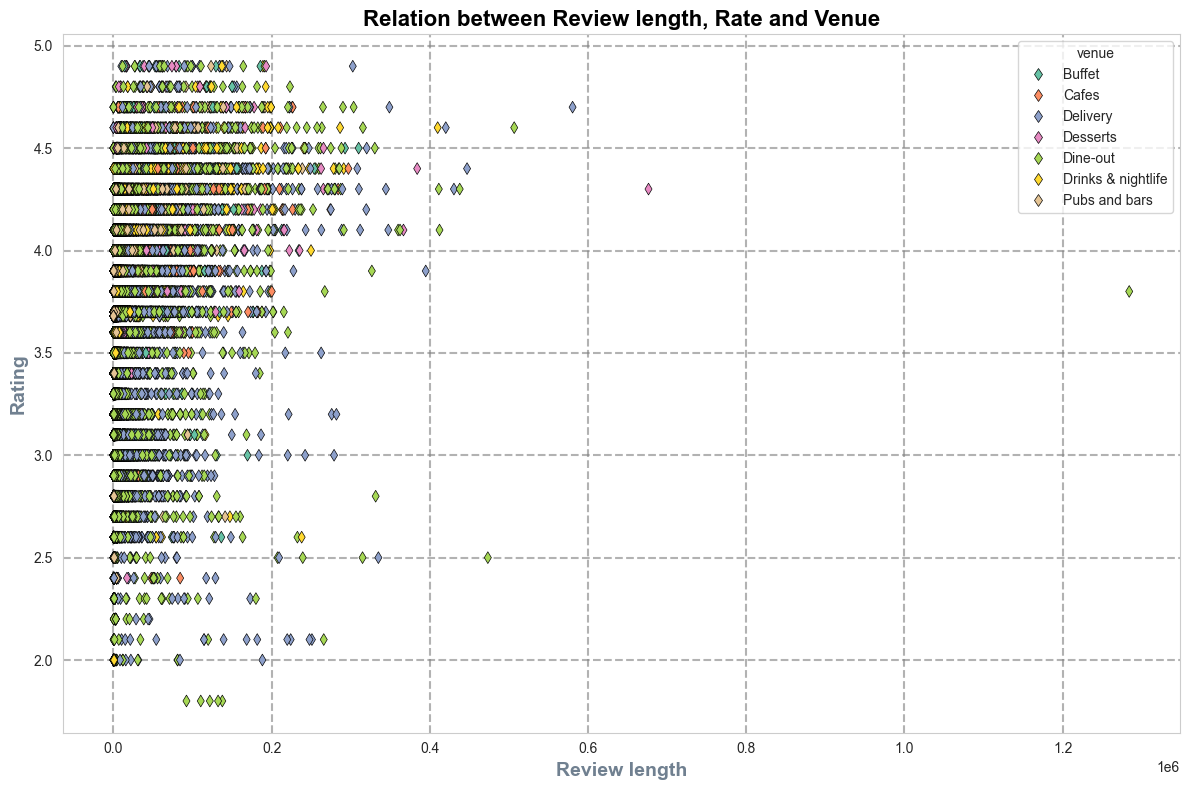

In [85]:
plt.figure(figsize= (12, 8))
sns.set_style('whitegrid')
sns.scatterplot(x= len_review, y= df['rate'], hue= df['venue'], palette= "Set2", marker= 'd', edgecolor= 'black')
plt.title("Relation between Review length, Rate and Venue", fontsize= 16, fontweight= 'bold', color= "black")
plt.xlabel("Review length", fontsize= 14, fontweight= "bold", color= 'slategray')
plt.ylabel("Rating", fontsize= 14, fontweight= "bold", color= "slategray")
plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.6)
plt.tight_layout()
plt.show()

In [86]:
df_1= df.copy()
df_1['length_review']= len_review

In [87]:
df_1[['length_review', 'rate']].corr(method= 'pearson')

,length_review,rate
length_review,1.000000,0.259409
rate,0.259409,1.000000


## 2. Can you identify any patterns in the most-liked dishes for different cuisines?

In [88]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,venue,city,rest_type_list
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,[Casual Dining]
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,[Casual Dining]
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,"[Cafe, Casual Dining]"
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,[Quick Bites]
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,[Casual Dining]


In [89]:
list(dishes.items())[:10]

[('Pasta', 3374),
 ('Lunch Buffet', 399),
 ('Masala Papad', 150),
 ('Paneer Lajawab', 13),
 ('Tomato Shorba', 16),
 ('Dum Biryani', 196),
 ('Sweet Corn Soup', 132),
 ('Momos', 931),
 ('Chocolate Nirvana', 4),
 ('Thai Green Curry', 65)]

In [90]:
df_2= df.copy()
df_2['cuisines'] = df_2['cuisines'].copy().str.lower()
df_2['dish_liked'] = df_2['dish_liked'].copy().str.lower()

df_2['cuisine_list']= df_2['cuisines'].str.split(',\s*')
df_2['dish_liked_list']= df_2['dish_liked'].str.split(',\s*')

df_2_exploded= df_2.explode('cuisine_list').explode('dish_liked_list')

In [91]:
df_2_exploded

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,venue,city,rest_type_list,cuisine_list,dish_liked_list
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","north indian, mughlai, chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,[Casual Dining],north indian,pasta
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","north indian, mughlai, chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,[Casual Dining],north indian,lunch buffet
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","north indian, mughlai, chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,[Casual Dining],north indian,masala papad
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","north indian, mughlai, chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,[Casual Dining],north indian,paneer lajawab
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","north indian, mughlai, chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,[Casual Dining],north indian,tomato shorba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,"ITPL Main Road, Whitefield",Bar,"cocktails, pizza, buttermilk",finger food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,[Bar],finger food,pizza
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,"ITPL Main Road, Whitefield",Bar,"cocktails, pizza, buttermilk",finger food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,[Bar],finger food,buttermilk
51716,The Nest - The Den Bengaluru,False,False,3.4,13,"ITPL Main Road, Whitefield","Bar, Casual Dining",pasta,"finger food, north indian, continental",1500,"[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield,"[Bar, Casual Dining]",finger food,pasta
51716,The Nest - The Den Bengaluru,False,False,3.4,13,"ITPL Main Road, Whitefield","Bar, Casual Dining",pasta,"finger food, north indian, continental",1500,"[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield,"[Bar, Casual Dining]",north indian,pasta


In [92]:
df_2_exploded.groupby(['cuisine_list', 'dish_liked_list']).size().reset_index(name= 'count').sort_values(by= 'count', ascending= False)

,cuisine_list,dish_liked_list,count
13494,north indian,pasta,11663
5270,chinese,pasta,8520
16141,south indian,pasta,5872
7992,fast food,pasta,5152
3132,biryani,pasta,3878
...,...,...,...
44,afghan,vegetable biryani,1
40,afghan,tandoori broccoli,1
35,afghan,rasgulla,1
4434,chettinad,prawn,1


In [93]:
cuisine_by_dish_liked= df_2_exploded.value_counts(['cuisine_list', 'dish_liked_list']).reset_index(name= 'count')
cuisine_by_dish_liked

,cuisine_list,dish_liked_list,count
0,north indian,pasta,11663
1,chinese,pasta,8520
2,south indian,pasta,5872
3,fast food,pasta,5152
4,biryani,pasta,3878
...,...,...,...
17579,afghan,vegetable biryani,1
17580,afghan,tandoori broccoli,1
17581,afghan,rasgulla,1
17582,chettinad,prawn,1


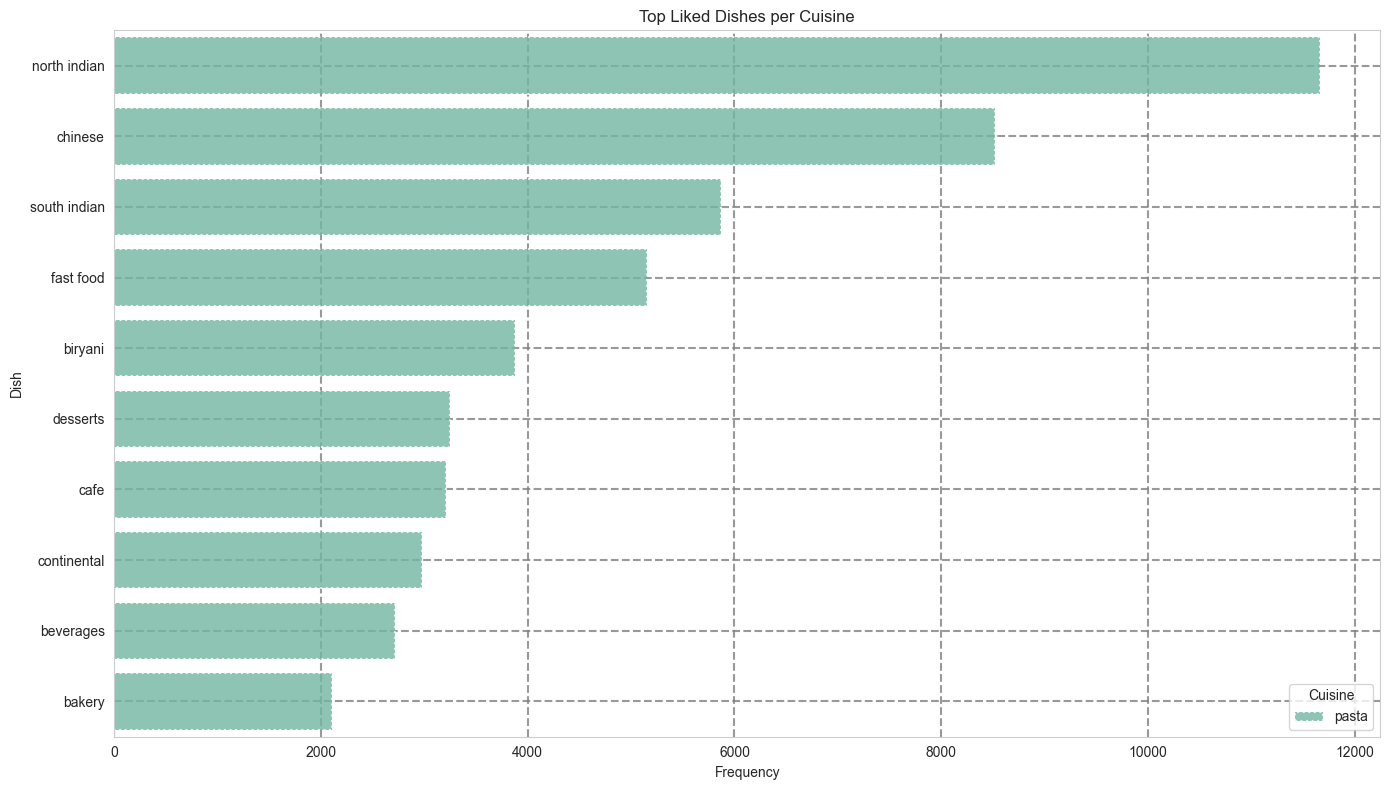

In [94]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.barplot(data=cuisine_by_dish_liked.head(10) , x='count', y='cuisine_list', hue='dish_liked_list', linewidth= 1.5, linestyle= ":", palette= "Set2", width= 0.8, alpha= 0.8)

plt.title("Top Liked Dishes per Cuisine")
plt.xlabel("Frequency")
plt.ylabel("Dish")

plt.legend(title='Cuisine')
plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.8)
plt.tight_layout()
plt.show()

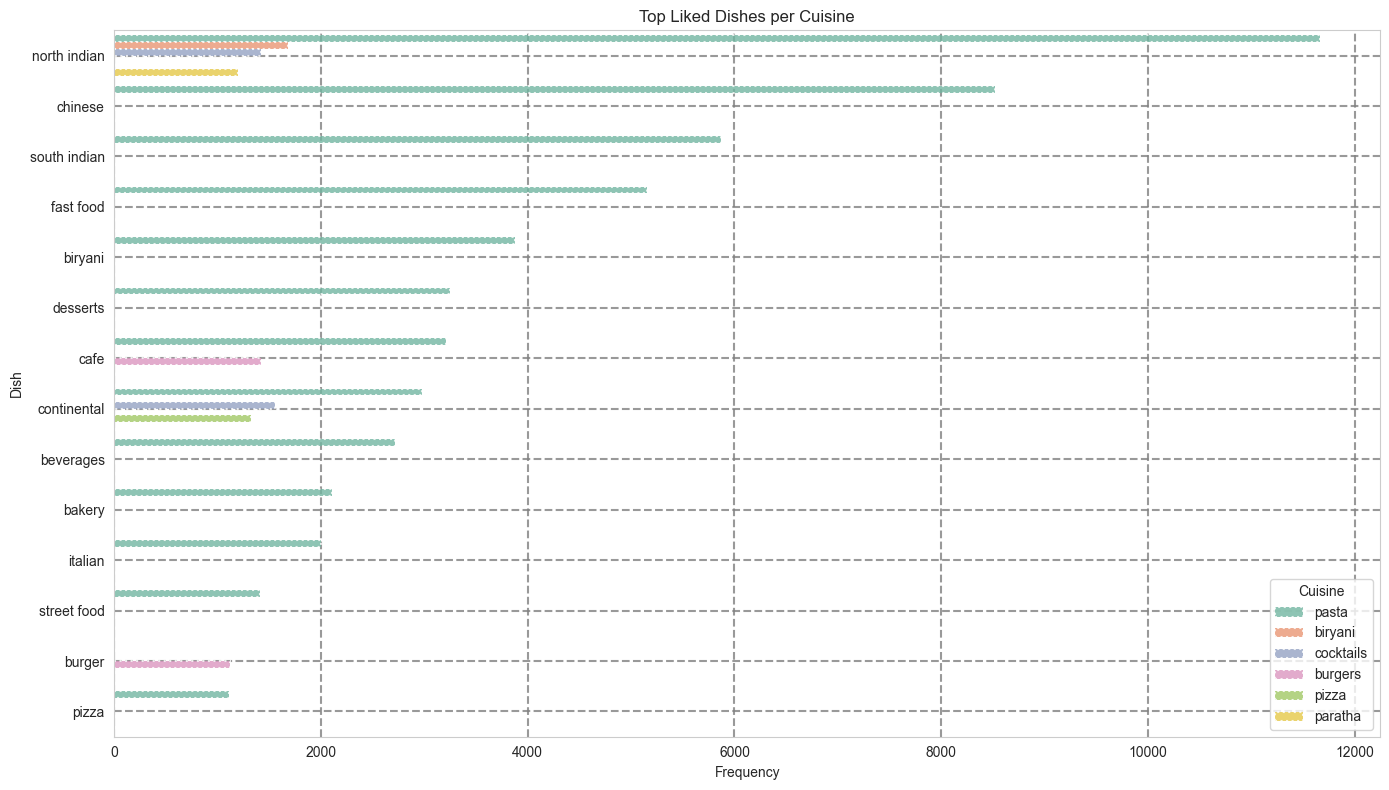

In [95]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.barplot(data=cuisine_by_dish_liked.head(20) , x='count', y='cuisine_list', hue='dish_liked_list', linewidth= 1.5, linestyle= ":", palette= "Set2", width= 0.8, alpha= 0.8)

plt.title("Top Liked Dishes per Cuisine")
plt.xlabel("Frequency")
plt.ylabel("Dish")

plt.legend(title='Cuisine')
plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.8)
plt.tight_layout()
plt.show()

In [96]:
cuisine_by_dish_liked[cuisine_by_dish_liked['dish_liked_list']== 'paratha']

,cuisine_list,dish_liked_list,count
17,north indian,paratha,1196
73,chinese,paratha,541
205,fast food,paratha,270
261,street food,paratha,219
327,south indian,paratha,179
329,biryani,paratha,179
416,kerala,paratha,144
584,beverages,paratha,109
653,rolls,paratha,98
662,continental,paratha,97


## 3. How are the restaurant costs distributed across the dataset?

In [97]:
df.cost.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140])

In [98]:
df.cost.describe()

count    51148.000000
mean       556.043736
std        439.555299
min         40.000000
25%        300.000000
50%        400.000000
75%        700.000000
max       6000.000000
Name: cost, dtype: float64

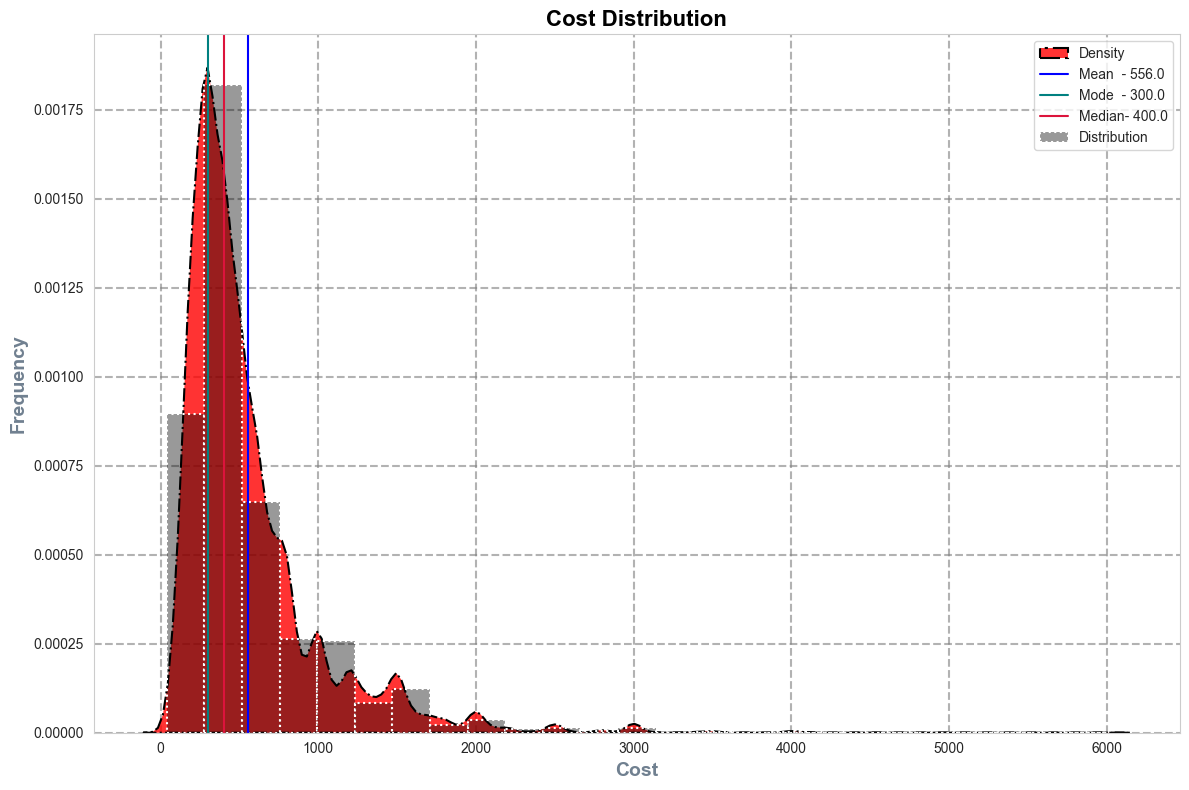

In [99]:
plt.figure(figsize= (12,8))
sns.set_style('whitegrid')

sns.kdeplot(df.cost, fill=True, linewidth= 1.5, linestyle= "-.", color= 'red', edgecolor= 'black', alpha= 0.8, label= "Density")
sns.histplot(df.cost, linewidth=1.5, linestyle= ":", color= "black", bins= 25, stat= 'density', alpha= 0.4, label= "Distribution")
plt.axvline(x= df.cost.mean(), linewidth= 1.5, linestyle= '-', color= 'blue', label= f"{'Mean':<6}- {df.cost.mean():.1f}")
plt.axvline(x= df.cost.mode().iloc[0], linewidth= 1.5, linestyle= '-', color= 'teal', label= f"{'Mode':<6}- {df.cost.mode().iloc[0]:.1f}")
plt.axvline(x= df.cost.median(), linewidth= 1.5, linestyle= '-', color= 'crimson', label= f"{'Median':<6}- {df.cost.median():.1f}")

plt.title("Cost Distribution", fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel("Cost", fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel("Frequency", fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.6)
plt.legend()
plt.tight_layout()
plt.show()

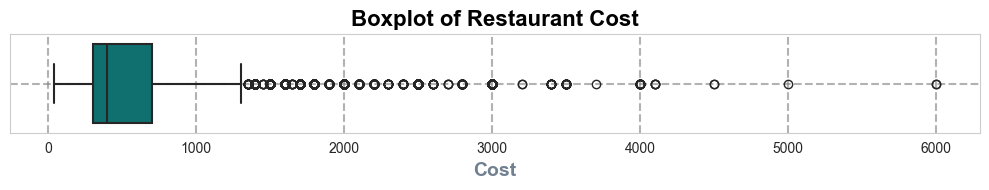

In [100]:
plt.figure(figsize=(10,2))
sns.set_style("whitegrid")
sns.boxplot(x=df['cost'], linewidth= 1.5, color= 'teal')

plt.title('Boxplot of Restaurant Cost', fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel('Cost', fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.6)
plt.tight_layout()
plt.show()

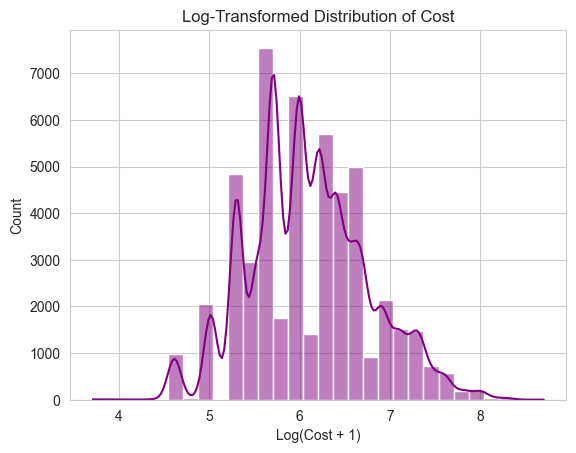

In [101]:
df['log_cost'] = np.log1p(df['cost'])

sns.histplot(df['log_cost'], bins=30, kde=True, color='purple')
plt.title('Log-Transformed Distribution of Cost')
plt.xlabel('Log(Cost + 1)')
plt.show()

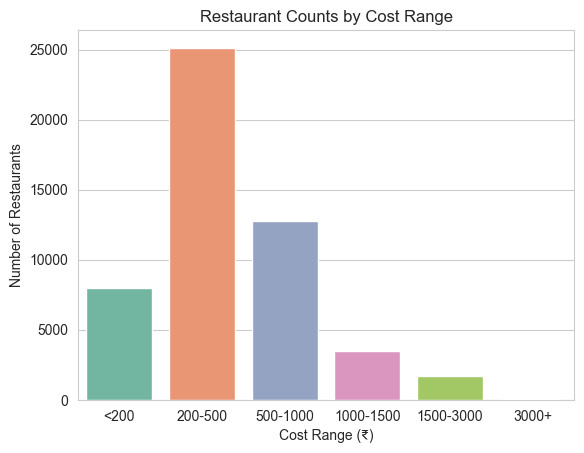

In [102]:
bins = [0, 200, 500, 1000, 1500, 3000, np.inf]
labels = ['<200', '200-500', '500-1000', '1000-1500', '1500-3000', '3000+']
df['cost_range'] = pd.cut(df['cost'], bins=bins, labels=labels)

sns.countplot(data=df, x='cost_range', order=labels, palette='Set2')
plt.title('Restaurant Counts by Cost Range')
plt.xlabel('Cost Range (₹)')
plt.ylabel('Number of Restaurants')
plt.show()

## 4.	What is the distribution of ratings in the dataset?

In [103]:
df.rate.unique()

array([4.1 , 3.8 , 3.7 , 3.6 , 4.6 , 4.  , 4.2 , 3.9 , 3.1 , 3.  , 3.2 ,
       3.3 , 2.8 , 4.4 , 4.3 , 3.68, 2.9 , 2.6 , 3.4 , 2.  , 2.7 , 4.7 ,
       2.4 , 2.2 , 2.3 , 4.8 , 3.5 , 2.5 , 4.5 , 4.9 , 2.1 , 1.8 ])

In [104]:
df.rate.describe()

count    51148.000000
mean         3.680992
std          0.408671
min          1.800000
25%          3.500000
50%          3.680000
75%          3.900000
max          4.900000
Name: rate, dtype: float64

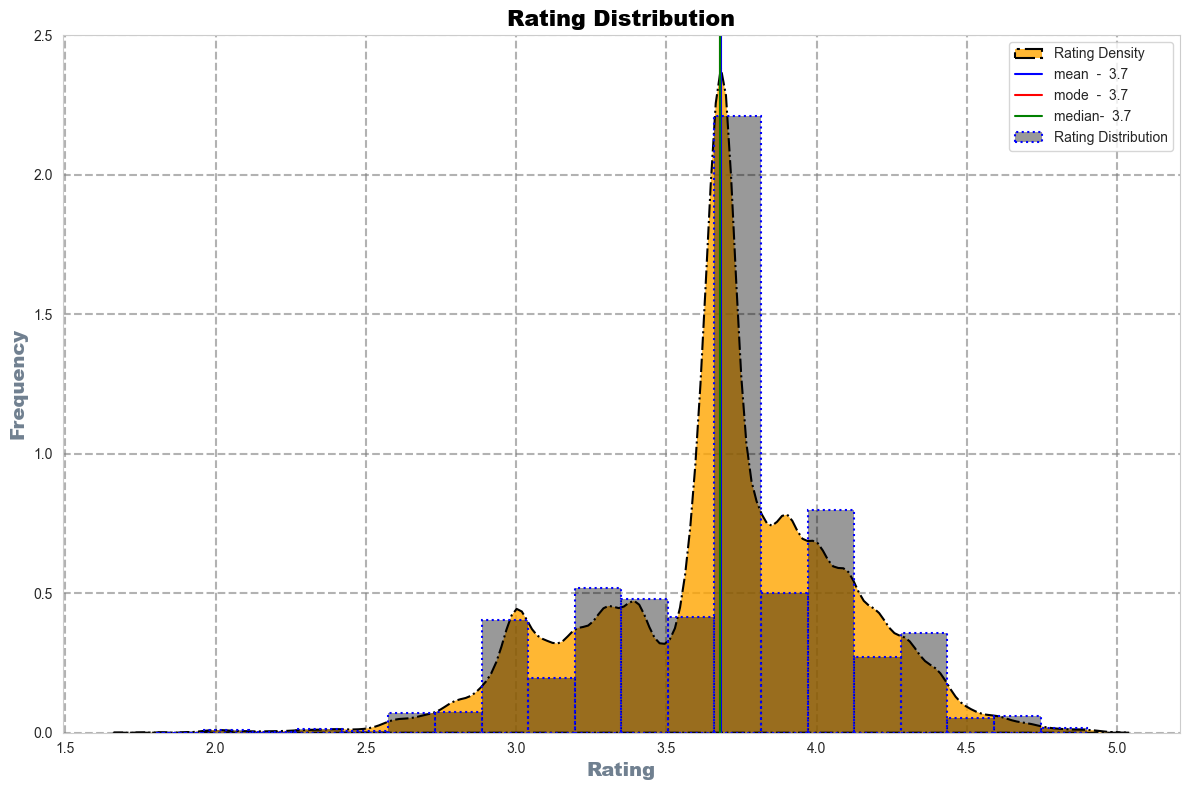

In [105]:
plt.figure(figsize= (12, 8))
sns.set_style('whitegrid')
sns.kdeplot(df.rate, fill= True, alpha= 0.8, linewidth= 1.5, linestyle= "-.", color= 'orange', edgecolor= "black", label= "Rating Density")
sns.histplot(df.rate, kde= False,stat= 'density', bins= 20, alpha= 0.4, linewidth= 1.5, linestyle= ':', color= 'black', edgecolor= 'blue', label= "Rating Distribution")
plt.axvline(x= df.rate.mean(), linewidth= 1.5, linestyle= "-", color= "blue", label= f"{'mean':<6}- {df.rate.mean(): .1f}")
plt.axvline(x= df.rate.mode().iloc[0], linewidth= 1.5, linestyle= "-", color= "red", label= f"{'mode':<6}- {df.rate.mode().iloc[0]: .1f}")
plt.axvline(x= df.rate.median(), linewidth= 1.5, linestyle= "-", color= "green", label= f"{'median':<6}- {df.rate.median(): .1f}")

plt.title("Rating Distribution", fontsize= 16, fontweight= 'black', color= 'black')
plt.xlabel("Rating", fontsize= 14, fontweight= 'black', color= 'slategray')
plt.ylabel("Frequency", fontsize= 14, fontweight= 'black', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.6)
plt.legend()
plt.tight_layout()
plt.show()

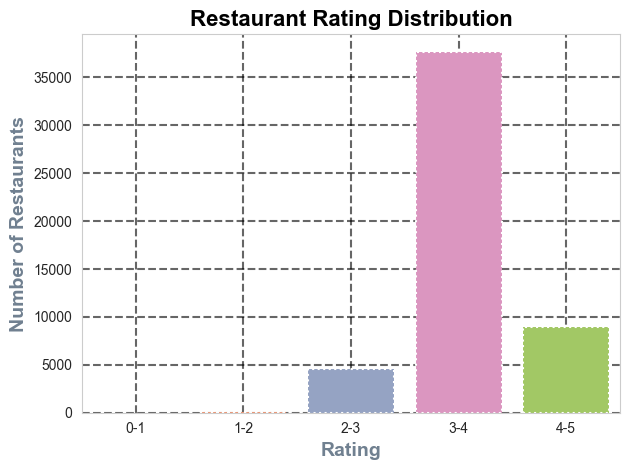

In [106]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['rate_distribution'] = pd.cut(df['rate'], bins=bins, labels=labels)

sns.countplot(data=df, x='rate_distribution', order=labels, linewidth= 1.5, linestyle= ":", palette='Set2')
plt.title('Restaurant Rating Distribution', fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel('Rating', fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel('Number of Restaurants', fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'black', alpha= 0.6)
plt.tight_layout()
plt.show()

## 5.	Find the location of top 5 most expensive restaurant?

In [107]:
df_expensive_location= df.sort_values('cost', ascending=False).head(15)
df_expensive_location

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,venue,city,rest_type_list,log_cost,cost_range,rate_distribution
45618,Le Cirque Signature - The Leela Palace,False,True,4.3,128,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Old Airport Road,[Fine Dining],8.699681,3000+,4-5
19139,Le Cirque Signature - The Leela Palace,False,True,4.3,126,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Indiranagar,[Fine Dining],8.699681,3000+,4-5
40266,Royal Afghan - ITC Windsor,False,True,4.3,413,Sankey Road,Fine Dining,"Dal Bukhara, Chocolate Cake, Butter Chicken, N...","North Indian, Mughlai",5000,"[('Rated 5.0', 'RATED\n It is just Bukhara wi...",[],Dine-out,Malleshwaram,[Fine Dining],8.517393,3000+,4-5
41591,Malties - Radisson Blu,False,False,4.3,53,Marathahalli,Lounge,"Cocktails, Jumbo Prawns, Charcuterie Platter, ...","Continental, Fast Food",4500,"[('Rated 3.0', ""RATED\n We had visited this p...",[],Dine-out,Marathahalli,[Lounge],8.412055,3000+,4-5
42141,Malties - Radisson Blu,False,False,4.3,53,Marathahalli,Lounge,"Cocktails, Jumbo Prawns, Charcuterie Platter, ...","Continental, Fast Food",4500,"[('Rated 3.0', ""RATED\n We had visited this p...",[],Drinks & nightlife,Marathahalli,[Lounge],8.412055,3000+,4-5
37715,La Brasserie - Le Meridien,False,True,4.1,309,Sankey Road,Fine Dining,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...","North Indian, Continental, Japanese, Chinese, ...",4100,"[('Rated 5.0', 'RATED\n We were here for thei...",[],Buffet,Lavelle Road,[Fine Dining],8.318986,3000+,4-5
39125,La Brasserie - Le Meridien,False,True,4.1,309,Sankey Road,Fine Dining,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...","North Indian, Continental, Japanese, Chinese, ...",4100,"[('Rated 5.0', 'RATED\n We were here for thei...",[],Dine-out,Lavelle Road,[Fine Dining],8.318986,3000+,4-5
39416,La Brasserie - Le Meridien,False,True,4.1,309,Sankey Road,Fine Dining,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...","North Indian, Continental, Japanese, Chinese, ...",4100,"[('Rated 5.0', 'RATED\n We were here for thei...",[],Buffet,Malleshwaram,[Fine Dining],8.318986,3000+,4-5
40262,La Brasserie - Le Meridien,False,True,4.1,309,Sankey Road,Fine Dining,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...","North Indian, Continental, Japanese, Chinese, ...",4100,"[('Rated 5.0', 'RATED\n We were here for thei...",[],Dine-out,Malleshwaram,[Fine Dining],8.318986,3000+,4-5
6154,Riwaz - The Ritz-Carlton,False,True,4.1,270,Residency Road,"Fine Dining, Bar","Tandoori Broccoli, Dal Makhani, Tamatar Ka Sho...",North Indian,4000,"[('Rated 4.0', 'RATED\n Great food; ambience ...",[],Dine-out,Brigade Road,"[Fine Dining, Bar]",8.294300,3000+,4-5


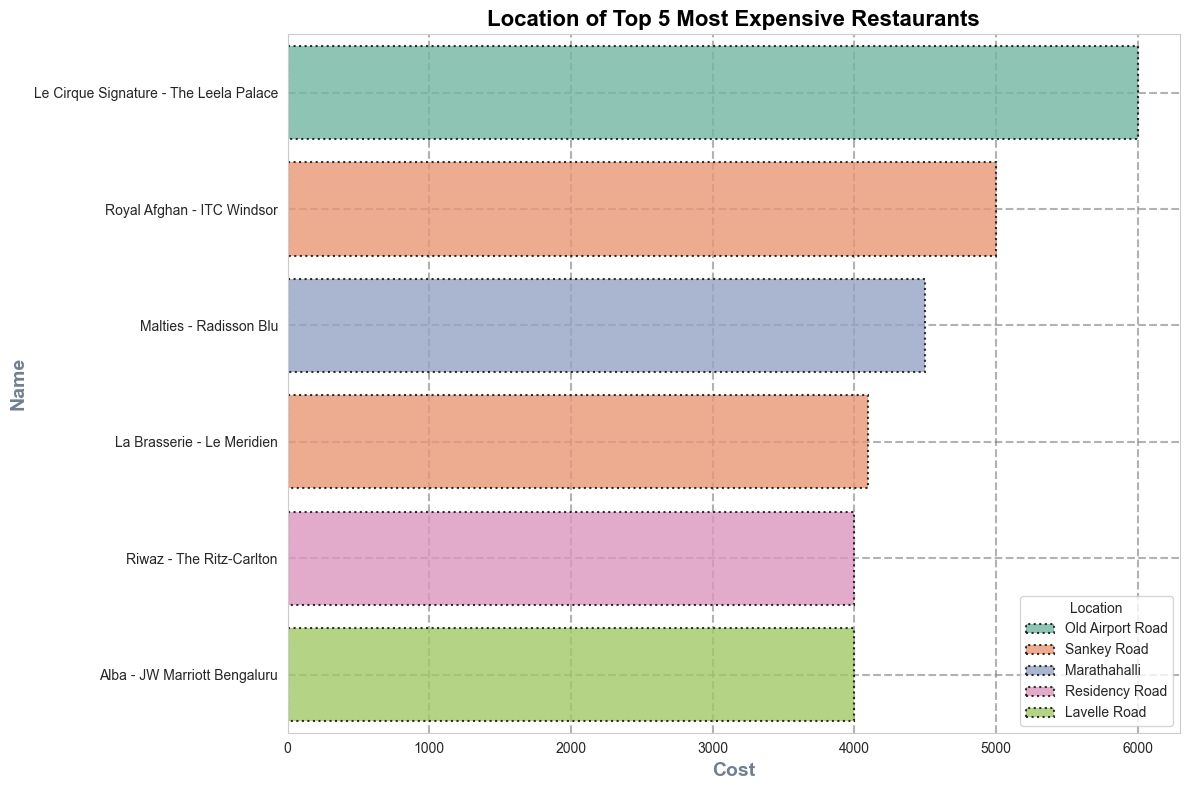

In [108]:
plt.figure(figsize= (12, 8))
sns.set_style('whitegrid')
sns.barplot(y= df_expensive_location['name'], x= df_expensive_location['cost'], hue= df_expensive_location['location'], linewidth= 1.5, linestyle= ":", palette= 'Set2',
           edgecolor= 'black', width= 0.8, alpha= 0.8)

plt.title("Location of Top 5 Most Expensive Restaurants", fontsize= 16, fontweight= 'bold', color= 'black')
plt.ylabel('Name', fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.xlabel("Cost", fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.6)
plt.legend(title= 'Location')
plt.tight_layout()
plt.show()

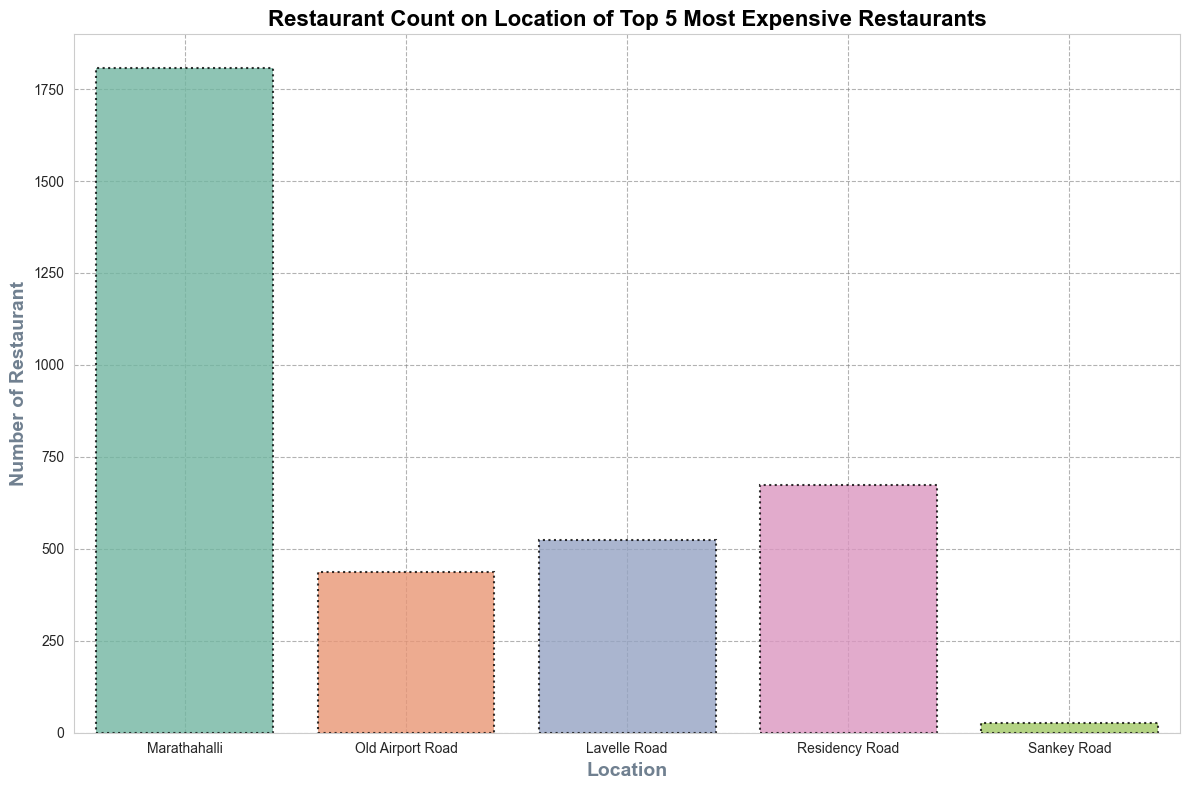

In [109]:
plt.figure(figsize= (12, 8))
sns.set_style('whitegrid')
sns.countplot(x=df[df.location.isin(df_expensive_location.location.unique())]['location'], linewidth= 1.5, linestyle= ":", palette= 'Set2', edgecolor= 'black', width= 0.8, alpha= 0.8)

plt.title("Restaurant Count on Location of Top 5 Most Expensive Restaurants", fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel("Location", fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel("Number of Restaurant", fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 0.8, linestyle= "--", color= 'grey', alpha= 0.6)
plt.tight_layout()
plt.show()

In [110]:
print(f"Top 5 locations of the most expensive restaurant are:\n{'\n'.join(df_expensive_location.location.unique())}.")

Top 5 locations of the most expensive restaurant are:
Old Airport Road
Sankey Road
Marathahalli
Residency Road
Lavelle Road.


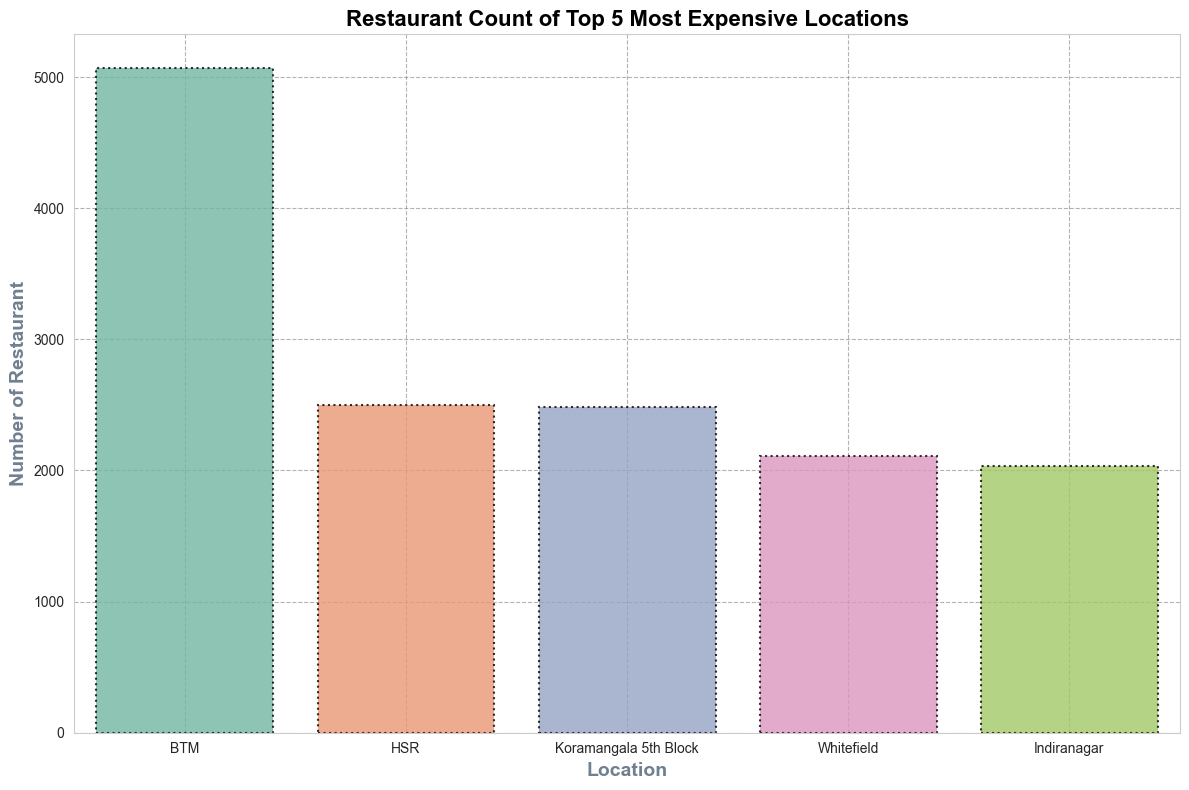

In [111]:
location_cost = df.groupby('location')['cost'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize= (12, 8))
sns.set_style('whitegrid')
sns.countplot(x=df[df.location.isin(location_cost.index)]['location'], linewidth= 1.5, linestyle= ":", palette= 'Set2', edgecolor= 'black', width= 0.8, alpha= 0.8)

plt.title("Restaurant Count of Top 5 Most Expensive Locations", fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel("Location", fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel("Number of Restaurant", fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 0.8, linestyle= "--", color= 'grey', alpha= 0.6)
plt.tight_layout()
plt.show()